# Script de modélisation

## Prise en compte des données

In [1]:
import pandas as pd
import numpy as np
import panel as pn

data = pd.read_csv('pricing_requests.csv')
data.head()

,Unnamed: 0,hotel_id,price,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,0,834,91,0,copenhagen,2,hungarian,0,6048,Yin Yang,8 Premium,0,0,0
1,1,757,151,1,copenhagen,2,hungarian,0,6048,Accar Hotels,Navatel,1,0,0
2,2,893,229,0,copenhagen,2,hungarian,0,6048,Morriott International,Morriot,1,1,0
3,3,989,108,0,copenhagen,2,hungarian,0,6048,Accar Hotels,Ibas,0,0,0
4,4,32,175,0,copenhagen,2,hungarian,0,6048,Morriott International,CourtYord,0,0,0


In [2]:
del(data["Unnamed: 0"]) #supprime la colonne des indexes
data.head()

,hotel_id,price,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,834,91,0,copenhagen,2,hungarian,0,6048,Yin Yang,8 Premium,0,0,0
1,757,151,1,copenhagen,2,hungarian,0,6048,Accar Hotels,Navatel,1,0,0
2,893,229,0,copenhagen,2,hungarian,0,6048,Morriott International,Morriot,1,1,0
3,989,108,0,copenhagen,2,hungarian,0,6048,Accar Hotels,Ibas,0,0,0
4,32,175,0,copenhagen,2,hungarian,0,6048,Morriott International,CourtYord,0,0,0


In [3]:
len(data)

255

In [4]:
data.dtypes

hotel_id            int64
price               int64
stock               int64
city               object
date                int64
language           object
mobile              int64
avatar_id           int64
group              object
brand              object
parking             int64
pool                int64
children_policy     int64
dtype: object

In [12]:
#On affecte le bon type aux variables qualitatives
data["city"]=pd.Categorical(data["city"],ordered=False)
data["language"]=pd.Categorical(data["language"],ordered=False)
data["group"]=pd.Categorical(data["group"],ordered=False)
data["brand"]=pd.Categorical(data["brand"],ordered=False)


data["mobile"]=pd.Categorical(data["mobile"],ordered=False)
data["parking"]=pd.Categorical(data["parking"],ordered=False)
data["pool"]=pd.Categorical(data["pool"],ordered=False)

data.dtypes
data.head()

,hotel_id,price,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,834,91,0,copenhagen,2,hungarian,0,6048,Yin Yang,8 Premium,0,0,0
1,757,151,1,copenhagen,2,hungarian,0,6048,Accar Hotels,Navatel,1,0,0
2,893,229,0,copenhagen,2,hungarian,0,6048,Morriott International,Morriot,1,1,0
3,989,108,0,copenhagen,2,hungarian,0,6048,Accar Hotels,Ibas,0,0,0
4,32,175,0,copenhagen,2,hungarian,0,6048,Morriott International,CourtYord,0,0,0


## Analyse de données

In [13]:
data.describe() #Indicateurs statistiques 1D pour les variables quantitatives

,hotel_id,price,stock,date,avatar_id,children_policy
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
mean,519.474510,192.223529,1.333333,1.525490,6048.474510,0.066667
std,292.091357,104.747921,2.915251,0.500332,0.500332,0.331227
min,1.000000,70.000000,0.000000,1.000000,6048.000000,0.000000
25%,281.500000,108.000000,0.000000,1.000000,6048.000000,0.000000
50%,531.000000,168.000000,0.000000,2.000000,6048.000000,0.000000
75%,770.500000,231.000000,1.000000,2.000000,6049.000000,0.000000
max,995.000000,481.000000,25.000000,2.000000,6049.000000,2.000000


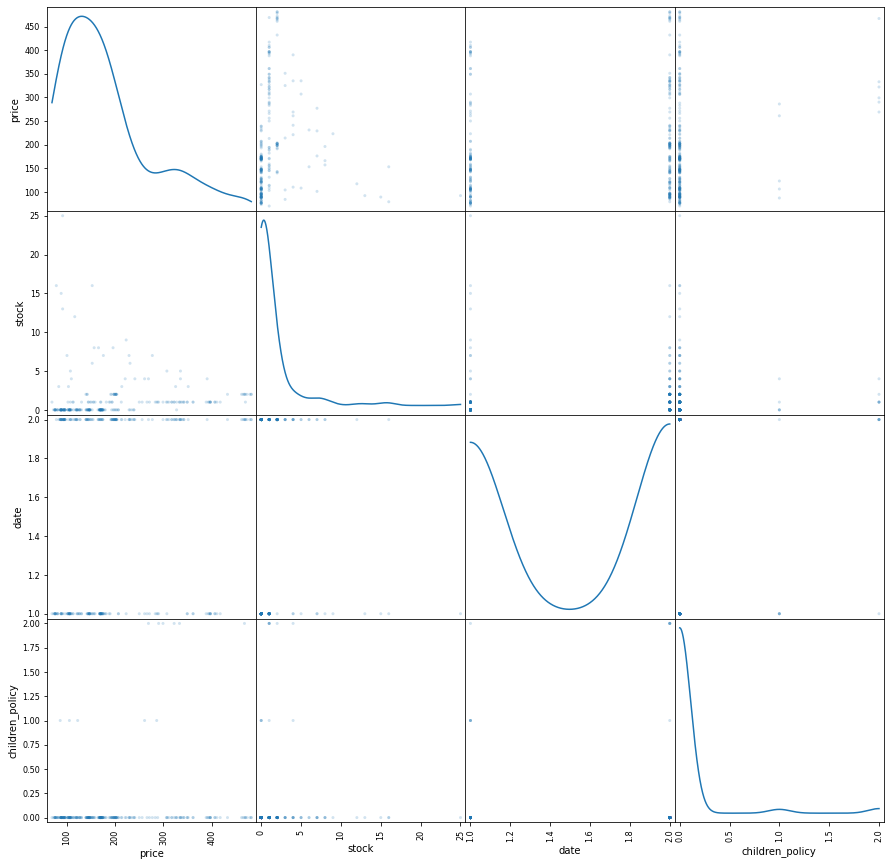

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

# scatter plot matrix des variables quantitatives
from pandas.plotting import scatter_matrix
scatter_matrix(data[["price","stock","date","children_policy"]], alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

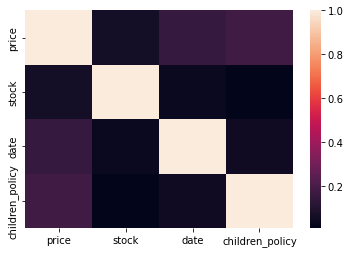

In [15]:
correlation_mat = data[["price","stock","date","children_policy"]].corr()

import seaborn as sns
sns.heatmap(correlation_mat, annot = False)

plt.show()